# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [5]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv



In [6]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [7]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [8]:
# Calculate the mean number of housing units per year (hint: use groupby) 
avg_housing_units= sfo_data.groupby('year').mean()
avg_housing_units

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560.0,1239.0
2011,341.903429,374507.0,1530.0
2012,399.389968,376454.0,2324.0
2013,483.600304,378401.0,2971.0
2014,556.277273,380348.0,3528.0
2015,632.540352,382295.0,3739.0
2016,697.643709,384242.0,4390.0


In [9]:
# Save the dataframe as a csv file
avg_housing_units.to_csv('avg_housing_units.csv')

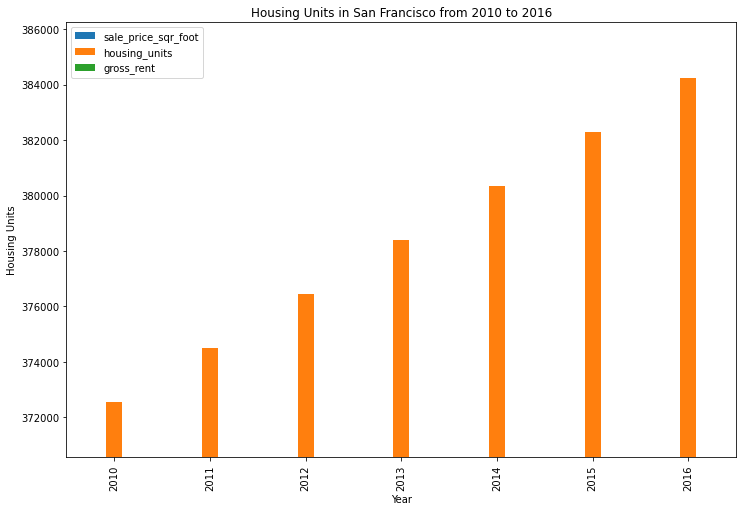

In [12]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.


# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
min = avg_housing_units.min()['housing_units']
max = avg_housing_units.max()['housing_units']
avg_housing_units.plot.bar(ylim =(min-2000, max+2000),title="Housing Units in San Francisco from 2010 to 2016",figsize=(12,8), xlabel="Year", ylabel="Housing Units")

plt.show()
plt.close('housing_units')

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [13]:
# Calculate the average sale price per square foot and average gross rent
sales_price_per_sqfoot = avg_housing_units["sale_price_sqr_foot"].groupby([avg_housing_units.index]).mean()
average_rent_sqfoot = avg_housing_units["gross_rent"].groupby([avg_housing_units.index]).mean()

<AxesSubplot:title={'center':'Sales Price Per Square Foot'}, xlabel='year'>

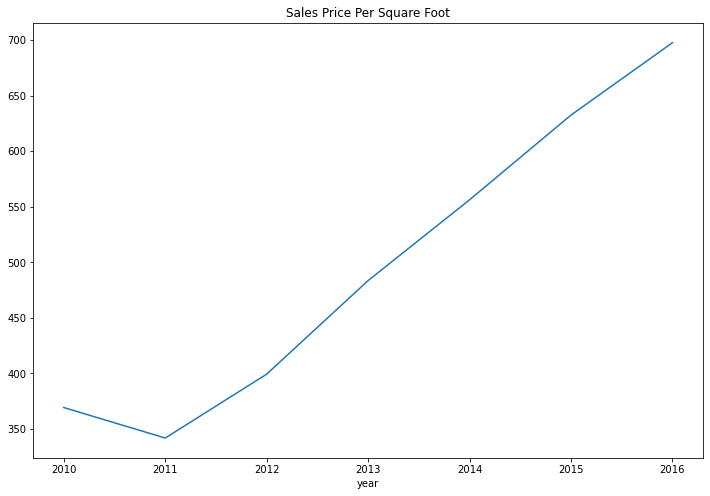

In [17]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
sales_price_per_sqfoot.plot.line(title="Sales Price Per Square Foot",figsize=(12,8))

<AxesSubplot:title={'center':'Average Gross Rent Per Year'}, xlabel='year'>

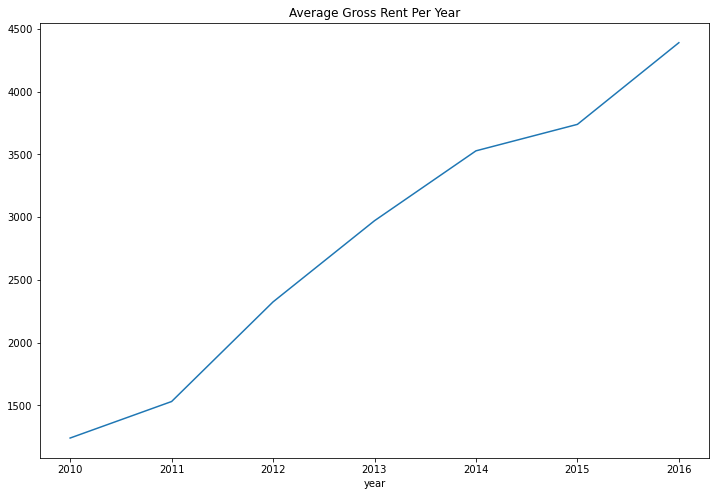

In [18]:
# Line chart for average montly rent
average_rent_sqfoot.plot.line(title="Average Gross Rent Per Year",figsize=(12,8))

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [19]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_df = sfo_data.groupby([sfo_data.index,'neighborhood']).mean().reset_index()
neighborhood_df.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560.0,1239.0
1,2010,Anza Vista,267.932583,372560.0,1239.0
2,2010,Bayview,170.098665,372560.0,1239.0
3,2010,Buena Vista Park,347.394919,372560.0,1239.0
4,2010,Central Richmond,319.027623,372560.0,1239.0


In [21]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot(label='Average Price per Square feet by year',x='year', y='sale_price_sqr_foot', xlabel='Year', ylabel='Avg. Sales Price per Square Foot',subplots=True, groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [23]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot.line("year","gross_rent", xlabel= "Year", ylabel="Avg. Rent", groupby="neighborhood")

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [27]:
# Getting the data from the top 10 expensive neighborhoods to own
expensive_neighborhoods = sfo_data.groupby("neighborhood").mean()
expensive_neighborhoods = expensive_neighborhoods.sort_values(by="sale_price_sqr_foot", ascending=False)
expensive_neighborhoods_top_10 = expensive_neighborhoods.head(10)
expensive_neighborhoods_top_10.reset_index(inplace=True)
expensive_neighborhoods_top_10

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
5,Telegraph Hill,676.506578,378401.00,2817.285714
6,Presidio Heights,675.350212,378401.00,2817.285714
7,Cow Hollow,665.964042,378401.00,2817.285714
8,Potrero Hill,662.013613,378401.00,2817.285714
9,South Beach,650.124479,375805.00,2099.000000


In [35]:
# Plotting the data from the top 10 expensive neighborhoods
expensive_neighborhoods_top_10.hvplot.bar(
    x='neighborhood',
    y="sale_price_sqr_foot",
    rot=90,
    height=500,
    width=800,
    ylabel='Average Sale Price per Square Foot',
    title="Top 10 Expensive Neighborhoods in San Francisco"
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [39]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
neighborhood_df.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560.0,1239.0
1,2010,Anza Vista,267.932583,372560.0,1239.0
2,2010,Bayview,170.098665,372560.0,1239.0
3,2010,Buena Vista Park,347.394919,372560.0,1239.0
4,2010,Central Richmond,319.027623,372560.0,1239.0


In [41]:
# Plotting the data from the top 10 expensive neighborhoods
neighborhood_df.hvplot.bar(
    x='year',
    y=['sale_price_sqr_foot', 'gross_rent'],
    xlabel='Year', 
    ylabel='Avg price, Gross rent', 
    groupby='neighborhood', 
    rot=90,
    width= 500, 
    height= 500,
)

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [45]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_locations_df = pd.read_csv(file_path)
neighborhood_locations_df.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [46]:
# Calculate the mean values for each neighborhood
neighborhood_mean_df = sfo_data.groupby(['neighborhood'])['sale_price_sqr_foot', 'housing_units', 'gross_rent'].mean().reset_index()
neighborhood_mean_df.head()

C:\Users\danie\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [47]:
# Join the average values with the neighborhood locations
join_df = pd.concat([neighborhood_mean_df, neighborhood_locations_df], axis='columns', join='inner').dropna()
join_df.drop(columns=['Neighborhood'], inplace=True)
join_df.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,37.728630,-122.443050


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

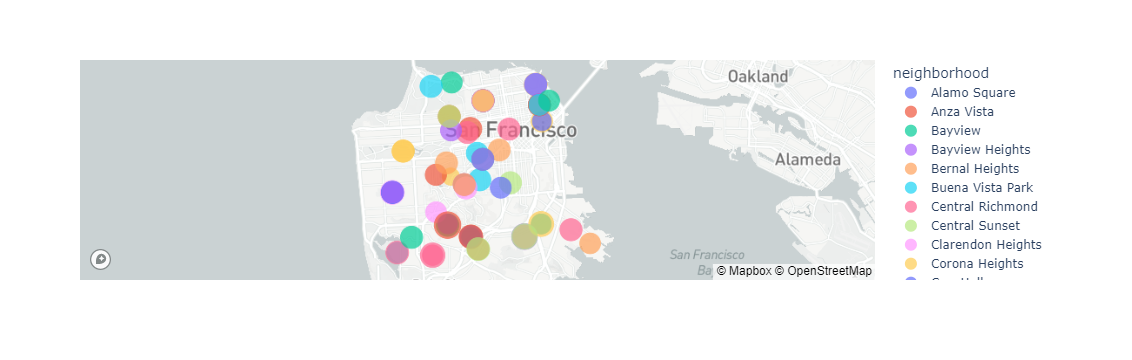

In [57]:
# Set the mapbox access token
px.set_mapbox_access_token("pk.eyJ1IjoiZGJ1ZGhyYW0iLCJhIjoiY2t5MHNrbHVlMDRhZjJ2b2RnaDAwc21mZiJ9.AC5JUWHEPzgWlVLMAL2qfQ")
# Create a scatter mapbox to analyze neighborhood info
map_plot = px.scatter_mapbox(
    join_df,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="neighborhood",
    zoom=10.2
)
map_plot.show()

- - -